In [1]:
#import os
#os.environ['JAVA_HOME'] = "/home/ssilvetti/Java/jdk1.8.0_172/"
#os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/jdk-11.0.5.jdk/Contents/Home"
from moonlight import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
script = """
signal { real x; real y;}
domain boolean; 
formula future = globally [0, 0.2]  (x > y);
formula past = historically [0, 0.2]  (x > y);
"""
moonlightScript = ScriptLoader.loadFromText(script)

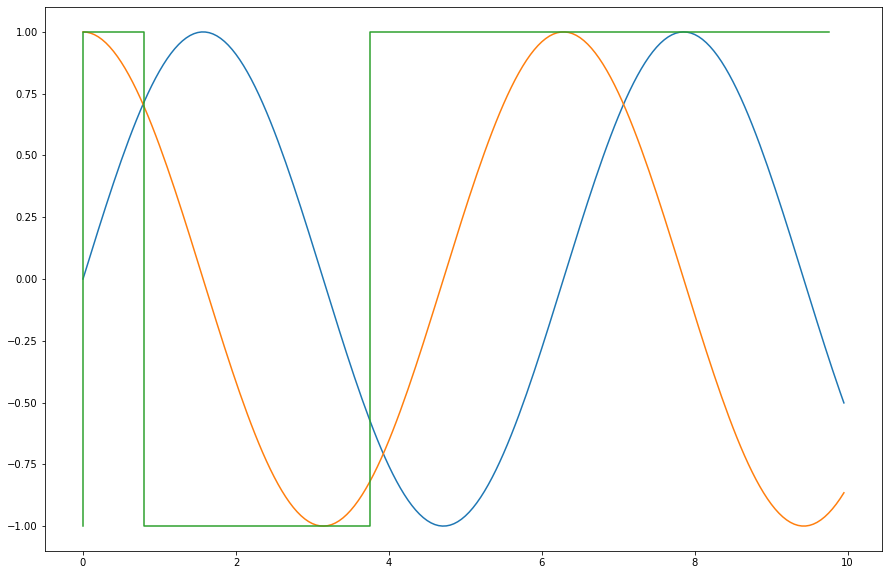

In [3]:
monitor = moonlightScript.getMonitor("future")
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)
space = list(zip(f1,f2))
result = np.array(monitor.monitor(time,space))
plt.plot(time,f1)
plt.plot(time,f2)
plt.step(result[:,0],result[:,1])

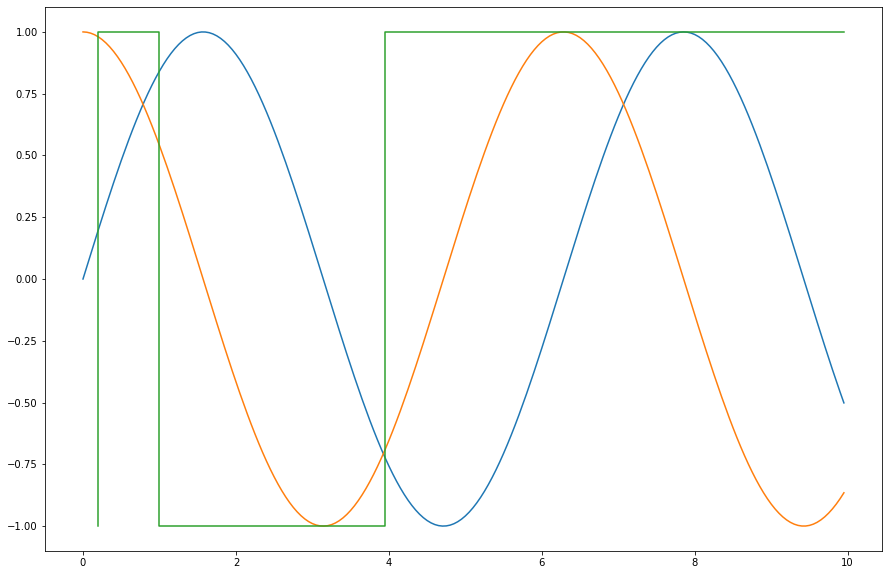

In [4]:
monitor = moonlightScript.getMonitor("past")
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)
space = list(zip(f1,f2))
result = np.array(monitor.monitor(time,space))
plt.plot(time,f1)
plt.plot(time,f2)
plt.step(result[:,0],result[:,1])

In [5]:
script = """
signal { real x}
domain boolean; 
formula future = globally [0, 0.2]  (x > 1);
"""
moonlightScript = ScriptLoader.loadFromText(script)

In [6]:
monitor = moonlightScript.getMonitor("future")
time =list(np.arange(0,10,0.05))
f1=np.sin(time)
space = [[x] for x in f1]
result =monitor.monitor(time,space)

In [7]:
result

[[0.0, -1.0], [9.750000000000002, -1.0]]

In [ ]:
script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""
moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = np.array([[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]])
locationTimeArray = np.array([0.0])
signal = np.array([[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]])

result = np.array(monitor.monitor(locationTimeArray,graph,locationTimeArray,signal))
print(result)